In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.linalg import norm
from PIL import Image
from matplotlib import pyplot as plt, rcParams, rc
from scipy.ndimage import imread
from skimage.measure import block_reduce
import cPickle as pickle
from scipy.ndimage.filters import correlate, convolve
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 6
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def plots(ims, interp=False, titles=None):
    ims=np.array(ims)
    mn,mx=ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(ims)):
        sp=f.add_subplot(1, len(ims), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn,vmax=mx)

def plot(im, interp=False):
    f = plt.figure(figsize=(3,6), frameon=True)
    plt.imshow(im, interpolation=None if interp else 'none')

plt.gray()
plt.close()

In [3]:
"""
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")
images, labels = mnist.train.images, mnist.train.labels
images = images.reshape((55000,28,28))
np.savez_compressed("MNIST_data/train", images=images, labels=labels)
"""
data = np.load("MNIST_data/train.npz")
images=data['images']
labels=data['labels']
n=len(images)
images.shape

(55000, 28, 28)

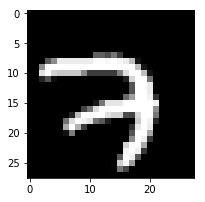

In [4]:
plot(images[0])

In [5]:
labels[0]

7

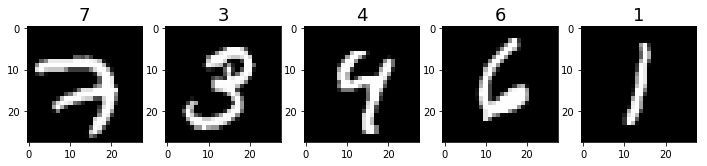

In [6]:
plots(images[:5], titles=labels[:5])

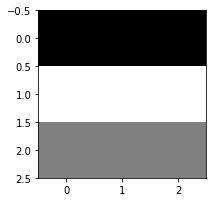

In [7]:
top=[[-1,-1,-1],
     [ 1, 1, 1],
     [ 0, 0, 0]]

plot(top)

In [8]:
r=(0,28)
def zoomim(x1=0,x2=28,y1=0,y2=28):
    plot(images[0,y1:y2,x1:x2])
w=interactive(zoomim, x1=r,x2=r,y1=r,y2=r)
w

interactive(children=(IntSlider(value=0, description=u'x1', max=28), IntSlider(value=28, description=u'x2', max=28), IntSlider(value=0, description=u'y1', max=28), IntSlider(value=28, description=u'y2', max=28), Output()), _dom_classes=('widget-interact',))

In [9]:
k=w.kwargs
dims = np.index_exp[k['y1']:k['y2']:1,k['x1']:k['x2']]
images[0][dims]

array([[ 0.2392,  0.2392,  0.2392,  0.2392,  0.2392,  0.502 ,  0.8706,  0.9961,  0.9961,  0.7412],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.1333,  0.8353,  0.9961,  0.9961],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.3294,  0.9961,  0.9961],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.3294,  0.9961,  0.9961],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.4157,  0.6157,  0.9961,  0.9961],
       [ 0.    ,  0.098 ,  0.4588,  0.8941,  0.8941,  0.8941,  0.9922,  0.9961,  0.9961,  0.9961],
       [ 0.4667,  0.8627,  0.9961,  0.9961,  0.9961,  0.9961,  0.9961,  0.9961,  0.9961,  0.9961],
       [ 0.9961,  0.9961,  0.9961,  0.8745,  0.8078,  0.8078,  0.2941,  0.2667,  0.8431,  0.9961],
       [ 0.8902,  0.451 ,  0.349 ,  0.1216,  0.    ,  0.    ,  0.    ,  0.    ,  0.7843,  0.9961],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.1882,  0.9059,  0.9961]], dtype=flo

In [10]:
corrtop = correlate(images[0], top)

In [11]:
corrtop[dims]

array([[-1.9647, -2.2706, -2.2706, -2.2706, -2.0078, -1.3765, -0.6196,  0.1294,  0.9059,  0.9882],
       [-1.0235, -0.7176, -0.7176, -0.7176, -0.9804, -1.4784, -1.4   , -0.898 ,  0.0941,  0.6235],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    , -0.1333, -0.6392, -0.6392, -0.5059,  0.4667],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.4157,  0.702 ,  0.702 ,  0.2863,  0.0353],
       [ 0.098 ,  0.5569,  1.451 ,  2.2471,  2.6824,  2.3647,  1.851 ,  0.9569,  0.3804,  0.0431],
       [ 1.498 ,  1.7686,  1.4039,  0.7412,  0.3059,  0.2078,  0.1059,  0.0039,  0.    ,  0.    ],
       [ 1.3882,  0.6627,  0.0118, -0.3098, -0.498 , -1.0784, -1.6196, -1.5843, -0.8824, -0.1529],
       [-0.6941, -1.298 , -1.9451, -2.2078, -2.3686, -1.9098, -1.3686, -0.6196, -0.3255, -0.1098],
       [-2.0471, -1.6902, -0.9216, -0.4706, -0.1216,  0.    ,  0.1882,  0.3098,  0.3098,  0.0941]], dtype=flo

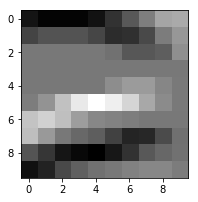

In [12]:
plot(corrtop[dims])

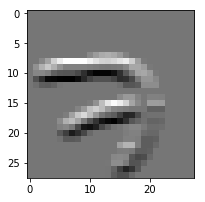

In [13]:
plot(corrtop)

In [14]:
np.rot90(top, 1)

array([[-1,  1,  0],
       [-1,  1,  0],
       [-1,  1,  0]])

True

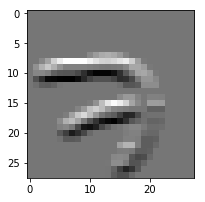

In [15]:
convtop = convolve(images[0], np.rot90(top,2))
plot(convtop)
np.allclose(convtop, corrtop)

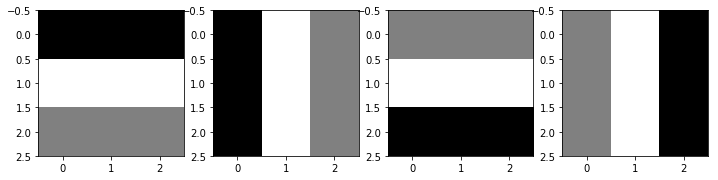

In [16]:
straights=[np.rot90(top,i) for i in range(4)]
plots(straights)

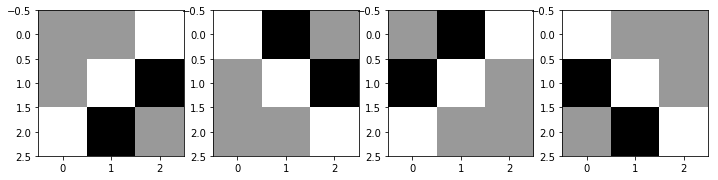

In [17]:
br=[[ 0, 0, 1],
    [ 0, 1,-1.5],
    [ 1,-1.5, 0]]

diags = [np.rot90(br,i) for i in range(4)]
plots(diags)

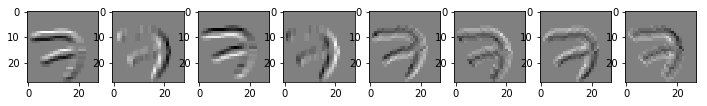

In [18]:
rots = straights + diags
corrs = [correlate(images[0], rot) for rot in rots]
plots(corrs)

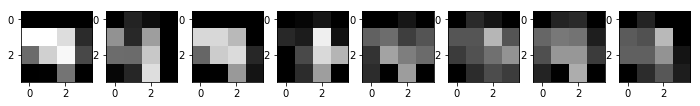

In [19]:
def pool(im): return block_reduce(im, (7,7), np.max)

plots([pool(im) for im in corrs])

In [21]:
twos=[images[i] for i in xrange(n) if labels[i]==2]
fours=[images[i] for i in xrange(n) if labels[i]==4]

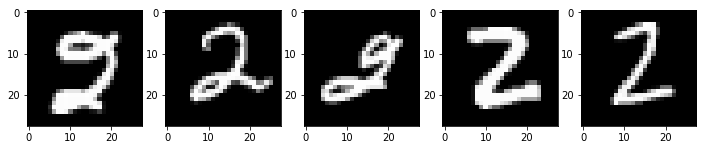

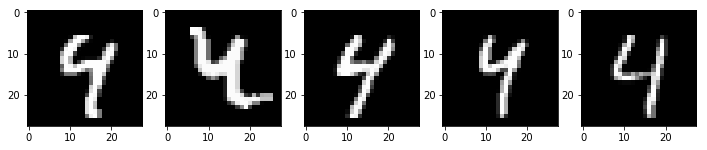

In [22]:
plots(twos[:5])
plots(fours[:5])

In [23]:
pool2 = [np.array([pool(correlate(im, rot)) for im in twos]) for rot in rots]

In [24]:
len(pool2), pool2[0].shape

(8, (5389, 4, 4))

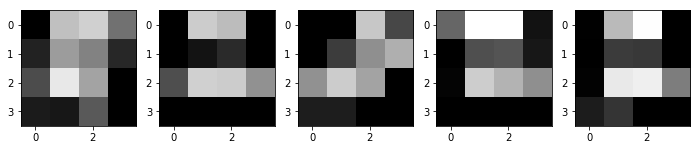

In [29]:
plots(pool2[0][0:5])

In [30]:
#normalize the arrays using the mean and standard deviation
def normalize(arr): return (arr-arr.mean())/arr.std()

In [31]:
filts2 = np.array([ims.mean(axis=0) for ims in pool2])
filts2 = normalize(filts2)

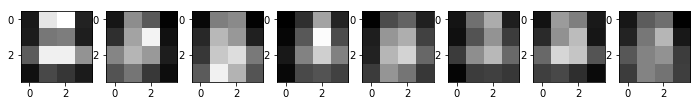

In [32]:
plots(filts2)

In [33]:
pool4 = [np.array([pool(correlate(im, rot)) for im in fours]) for rot in rots]
filts4 = np.array([ims.mean(axis=0) for ims in pool4])
filts4 = normalize(filts4)

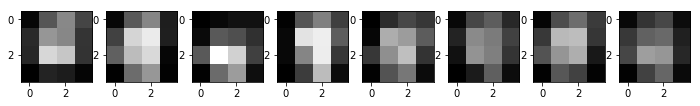

In [34]:
plots(filts4)

In [35]:
def pool_corr(im): return np.array([pool(correlate(im, rot)) for rot in rots])

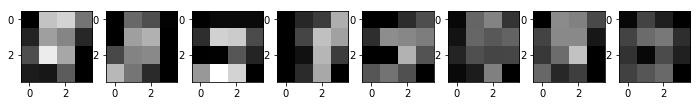

In [36]:
plots(pool_corr(twos[0]))

In [37]:
def sse(a,b): return ((a-b)**2).sum()
def is2_n2(im): return 1 if sse(pool_corr(im),filts4) > sse(pool_corr(im),filts2) else 0

In [38]:
sse(pool_corr(twos[0]), filts2), sse(pool_corr(twos[0]), filts2)

(161.00314, 161.00314)

In [40]:
[np.array([is2_n2(im) for im in ims]).sum() for ims in [twos,fours]]

[5150, 54]

In [42]:
[np.array([(1-is2_n2(im)) for im in ims]).sum() for ims in [twos,fours]]

[320, 5253]

In [43]:
def n1(a,b): return (np.fabs(a-b)).sum()
def is2_n1(im): return 1 if n1(pool_corr(im),filts2) > n1(pool_corr(im),filts2) else 0

In [44]:
[np.array([is2_n1(im) for im in ims]).sum() for ims in [twos,fours]]

[0, 0]

In [45]:
[np.array([(1-is2_n1(im)) for im in ims]).sum() for ims in [twos,fours]]

[5470, 5307]